# ESIS Mission Paper

In [1]:
import matplotlib.pyplot as plt
import astropy.units as u
import pylatex
import kgpy.format
import esis

In [2]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

In [3]:
# plt.rcParams['axes.labelsize'] = 'small'
# plt.rcParams['xtick.labelsize'] = 'small'
# plt.rcParams['ytick.labelsize'] = 'small'
# plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9

In [4]:
esis_optics = esis.flight.optics.as_measured()

In [5]:
level_0 = esis.flight.level_0(caching=True)

<IPython.core.display.Javascript object>


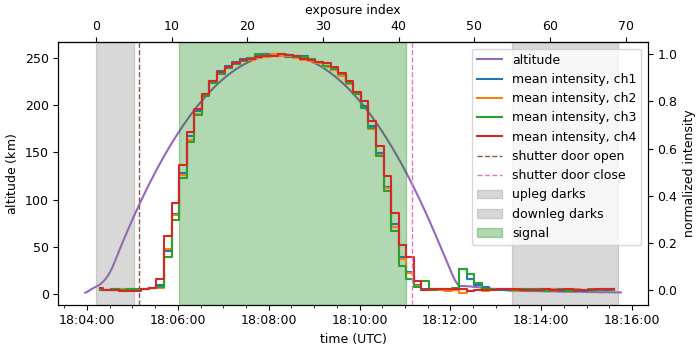

c:\users\byrdie\appdata\local\programs\python\python37\lib\site-packages\astropy\units\quantity.py:1039: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = super().__getitem__(key)


In [6]:
fig_sig_and_alt, ax_altitude = plt.subplots(figsize=(7,3.5), constrained_layout=True)
level_0.add_index_axis_to_time_axis(ax_altitude);
ax_signal = level_0.plot_altitude_and_signal_vs_time(ax=ax_altitude);
# level_0.timeline.t0.plot(ax=ax_signal, time_start=level_0.time_start)
level_0.timeline.shutter_door_open.plot(ax=ax_signal, time_start=level_0.time_start);
level_0.timeline.shutter_door_close.plot(ax=ax_signal, time_start=level_0.time_start);
level_0.plot_dark_spans(ax=ax_signal)
level_0.plot_signal_span(ax=ax_signal)
fig_sig_and_alt.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax_altitude.transAxes)
fig_sig_and_alt.savefig('figures/signal_and_altitude_vs_time.pdf')

In [7]:
class BasicContainer(pylatex.base_classes.Container):
    def dumps(self):
        result = ''
        for item in self:
            result = result + item.dumps() + '\n'
        return result

In [8]:
def new_variable(name:str, value: str):
    return pylatex.Command('newcommand', [pylatex.NoEscape('\\' + name), pylatex.NoEscape(value)])

In [9]:
doc = BasicContainer()
doc.append(new_variable('timestart', level_0.time_start.strftime('%H:%M:%S')))
doc.append(new_variable('datastart', level_0.time_exp_start[level_0.index_signal_first].min().strftime('%H:%M:%S')))
doc.append(new_variable('datastop', level_0.time_exp_end[level_0.index_signal_last].min().strftime('%H:%M:%S')))
doc.append(new_variable('numdataframes', level_0.intensity_signal.shape[0]))
doc.append(new_variable('numdarkframes', level_0.darks.shape[0]))
doc.append(new_variable('fov', kgpy.format.quantity((2 * esis_optics.source.half_width_x).to(u.arcmin), digits_after_decimal=1)))
doc.append(new_variable('readnoiseI', kgpy.format.quantity(esis_optics.detector.readout_noise[0], digits_after_decimal=1)))
doc.append(new_variable('readnoiseII', kgpy.format.quantity(esis_optics.detector.readout_noise[1], digits_after_decimal=1)))
doc.append(new_variable('readnoiseIII', kgpy.format.quantity(esis_optics.detector.readout_noise[2], digits_after_decimal=1)))
doc.append(new_variable('readnoiseIV', kgpy.format.quantity(esis_optics.detector.readout_noise[3], digits_after_decimal=1)))
doc.append(new_variable('platescalex', kgpy.format.quantity(esis_optics.plate_scale.x)))
doc.append(new_variable('platescaley', kgpy.format.quantity(esis_optics.plate_scale.y)))
doc.generate_tex('variables_rts')

c:\users\byrdie\appdata\local\programs\python\python37\lib\site-packages\astropy\units\quantity.py:477: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
c:\users\byrdie\appdata\local\programs\python\python37\lib\site-packages\astropy\units\quantity.py:477: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


num 2d secant iterations 3


C:\Users\byrdie\Kankelborg-Group\kgpy\kgpy\vector.py:275: RuntimeWarning: Mean of empty slice
  x=self.x.__array_function__(function, types_x, args_x, kwargs),
C:\Users\byrdie\Kankelborg-Group\kgpy\kgpy\vector.py:276: RuntimeWarning: Mean of empty slice
  y=self.y.__array_function__(function, types_y, args_y, kwargs),
C:\Users\byrdie\Kankelborg-Group\kgpy\kgpy\vector.py:499: RuntimeWarning: Mean of empty slice
  result.z = self.z.__array_function__(function, types_z, args_z, kwargs)
<string>:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
c:\users\byrdie\appdata\local\programs\python\python37\lib\site-packages\astropy\units\quantity.py:477: RuntimeWarning: divide by zero encountered in reciprocal
  result = super().__array_ufunc__(function, method, *arr